# Waternet Example

- Code: https://github.com/tnwei/waternet
- Original paper: https://arxiv.org/abs/1901.05495

## Init network

In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Make sure you are connected to a GPU instance
torch.cuda.is_available()

True

In [3]:
# Load from torchhub
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
model.cuda()
model.eval();

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/tnwei/waternet/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://www.dropbox.com/s/j8ida1d86hy5tm4/waternet_exported_state_dict-daa0ee.pt?dl=1" to /root/.cache/torch/hub/checkpoints/waternet_exported_state_dict-daa0ee.pt


In [5]:
import os
project = "beneaththewater"
if os.path.isdir(project):
  !rm -rf {project}
!git clone https://github.com/hzxsunshine/beneaththewater.git

Cloning into 'beneaththewater'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 117 (delta 48), reused 84 (delta 28), pack-reused 0
Receiving objects: 100% (117/117), 488.27 KiB | 5.95 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [9]:
from beneaththewater.utils.data_preparation import get_data
get_data("lsui")
!find . -type f -name '._*' -delete

Downloading...
From: https://drive.google.com/uc?id=1kn-ym4BPAcZSmjNIomLx_2qYx6DNwNHz
To: /content/lsui_test.gz
100%|██████████| 494M/494M [00:06<00:00, 76.9MB/s]


Downloaded data from Google Drive, start unzipping...
Unzipped data.


## Image example

Source: NotBurtsBees - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=115615060

In [14]:
from tqdm import tqdm

In [12]:
from beneaththewater.configs.constants import path_to_lsui
images = os.listdir(f"./backup/input")
!mkdir ./backup/output/

In [11]:
len(images)

4279

In [17]:
for img_path in tqdm(images, total=len(images)):
  # Load one image using OpenCV
  im = cv2.imread(f"./backup/input/{img_path}")
  rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  # Resize image
  rgb_im = cv2.resize(rgb_im, (720, 480))
  # Inference -> return numpy array (1, 3, H, W)
  rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
  out_ten = model(rgb_ten.cuda(), wb_ten.cuda(), he_ten.cuda(), gc_ten.cuda())
  out_im = postprocess(out_ten)

  # Save the output image
  output_image_path = f"./backup/output/{img_path}"
  cv2.imwrite(output_image_path, cv2.cvtColor(out_im[0], cv2.COLOR_RGB2BGR))

  5%|▍         | 204/4279 [01:46<35:23,  1.92it/s]


KeyboardInterrupt: ignored

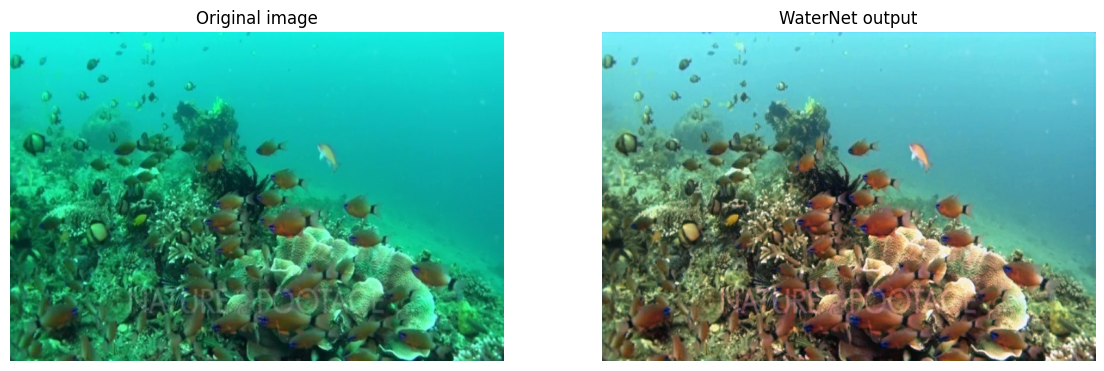

In [ ]:
# visualizations:
# only for one image
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].imshow(rgb_im)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(out_im[0])
ax[1].axis("off")
ax[1].set_title("WaterNet output")

plt.show()